In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os

In [5]:
titles = pd.read_csv(r"..\dataset\titles.csv")
credits = pd.read_csv(r".\dataset\credits.csv")

FileNotFoundError: [Errno 2] No such file or directory: '.\\dataset\\titles.csv'

## "Titles" data frame

In [ ]:
# Get the number of rows and columns in the "titles" data frame
print("Number of rows (instances): ", titles.shape[0])
print("Number of columns (attributes): ", titles.shape[1])

In [ ]:
# Will show the first few rows of the data frame
titles.head()

### About the dataset: Instances and Attributes

This dataset contains 2825 unique titles on Paramount with 15 columns containing their information, including:

- id: The title ID on JustWatch.
- title: The name of the title.
- show_type: TV show or movie.
- description: A brief description.
- release_year: The release year.
- age_certification: The age certification.
- runtime: The length of the episode (SHOW) or movie.
- genres: A list of genres.
- production_countries: A list of countries that produced the title.
- seasons: Number of seasons if it's a SHOW.
- imdb_id: The title ID on IMDB.
- imdb_score: Score on IMDB.
- imdb_votes: Votes on IMDB.
- tmdb_popularity: Popularity on TMDB.
- tmdb_score: Score on TMDB.

In [ ]:
# Getting the information about the DataFrame, including column names, data types, and non-null counts
titles.info()

### Data Analysis

In [ ]:
# Checking unique values in numerical columns

print("All of the release years:\n", np.sort(titles['release_year'].unique()))
print("Number of release years:\n", titles['release_year'].unique().size)


In [ ]:
print("All of the possible season lengths:\n", np.sort(titles['seasons'].unique()))
print("Number of possible season lengths:\n", titles['seasons'].unique().size)

In [ ]:
# We can check what the mean, median and mode are for 
# - imdb_score
# - imdb_votes
# - tmdb_popularity
# - tmdb_score 
# are 

# I took this code from chatGPT by asking it to help me turn a bunch of print commands into a table 

statistics = {
    'Attribute': ['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
    'Mean': [titles['imdb_score'].mean(), titles['imdb_votes'].mean(), titles['tmdb_popularity'].mean(), titles['tmdb_score'].mean()],
    'Median': [titles['imdb_score'].median(), titles['imdb_votes'].median(), titles['tmdb_popularity'].median(), titles['tmdb_score'].median()],
    'Mode': [titles['imdb_score'].mode()[0], titles['imdb_votes'].mode()[0], titles['tmdb_popularity'].mode()[0], titles['tmdb_score'].mode()[0]]
}

df = pd.DataFrame(statistics)
df

In [ ]:
# Checking the correlation between imdb_score and tmdb_score
correlation = titles[['imdb_score', 'tmdb_score']].corr()
print("Correlation between imdb_score and tmdb_score: ")
correlation

In [ ]:
# Frequency distribution of show type
sns.countplot(x='type', data=titles)
plt.title('Frequency Distribution of Show Type')
plt.show()

In [6]:
# Here we can see that there are a lot more movies than there are shows in this data set.

In [7]:
# How many movies/shows of a certain age certification are there?
cross_tab = pd.crosstab(titles['type'], titles['age_certification'])
cross_tab

NameError: name 'titles' is not defined

In [8]:
# Comparing the ratings of movies and shows

# Filter the data for "MOVIE" and "SHOW" types
movies = titles[titles['type'] == 'MOVIE']
shows = titles[titles['type'] == 'SHOW']

# Create a histogram plot for movie ratings
sns.histplot(data=movies, x='imdb_score', label='MOVIE', alpha=0.5)

# Create a histogram plot for show ratings
sns.histplot(data=shows, x='imdb_score', label='SHOW', alpha=0.5)

# Set labels and legend
plt.xlabel('IMDb Score')
plt.ylabel('Number of instances with a certain rating')
plt.legend()

NameError: name 'titles' is not defined

In [9]:
# We can see that the shows are generally rated better than the movies (despite there being significantly less shows compared 
# to the number of movies, there are more shows rated with 7.5 - 9.5)

In [10]:
# What genres are the most common in the dataset?

genres = titles['genres']
genres_split = genres.str.split(',')
    
genres_cleaned = []
for genre_list in genres_split:
    cleaned_genres = [genre.replace("'", "").replace("[", "").replace("]", "").replace(" ", "") for genre in genre_list]
    genres_cleaned.append(cleaned_genres)

all_genres = []
for genre in genres_cleaned:
    for g in genre:
         all_genres.append(g)

# for g in all_genres:
#     print(g)

all_genres_series = pd.Series(all_genres)
genre_counts = all_genres_series.value_counts()

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Occurrences of Genres in Movies and Shows Dataset')
plt.show()

NameError: name 'titles' is not defined

### Data Cleanup

In [11]:
titles.isna().sum()

NameError: name 'titles' is not defined

In [12]:
# Checking which show types exist so that we can see whether there are any TV shows without a number of seasons 
# or if it's just movies (which naturally don't have seasons) 
show_types = set(titles.type)
show_types

NameError: name 'titles' is not defined

In [13]:
# we conclude that the only instances without seasons are movies
tv_show_with_missing_seasons = titles[(titles['type'] == 'SHOW') & titles['seasons'].isnull()]
tv_show_with_missing_seasons

NameError: name 'titles' is not defined

In [14]:
# We simply set the number of seasons for movies to 0 - since movies don't have any seasons.
titles.loc[titles["seasons"].isna(), "seasons"] = 0.0

NameError: name 'titles' is not defined

In [15]:
titles.isna().sum()

NameError: name 'titles' is not defined

In [16]:
# The age certification column is not that interesting to us - we can drop it.
titles = titles.drop(columns=["age_certification"])

NameError: name 'titles' is not defined

In [17]:
# We can also drop the instances without an imdb_id, since there are not a lot of them.
titles = titles.dropna(subset=["imdb_id"])

NameError: name 'titles' is not defined

In [18]:
# There are only 13 movies without description so we can just drop those instances
titles = titles.dropna(subset=["description"])

NameError: name 'titles' is not defined

In [19]:
# We want to compare the IMDB score with the TMDB score and see if there are 
#significant differences between them:

g1 = sns.kdeplot(data = titles, x = 'imdb_score')
g2 = sns.kdeplot(data = titles, x = 'tmdb_score')


NameError: name 'titles' is not defined

In [20]:
# The distributions are similar. 
# We have also previously noticed that the correlation between imdb_score and tmdb_score is moderately
# strong as well (~0.6)
#Let's see if there are any instances that have a TMDB score,
# that don't have an IMDB score

has_tmdb_no_imdb = titles[(titles['imdb_score'].isnull()) & (titles['tmdb_score'])]
has_tmdb_no_imdb

NameError: name 'titles' is not defined

In [27]:
# We can assign those TMDB scores to the corresponding IMDB scores and drop the TMDB column, 
# since we don't need two similar scores.

titles.loc[titles["imdb_score"].isna(), "imdb_score"] = titles["tmdb_score"]
titles = titles.drop(columns=["tmdb_score"])

In [28]:
# We can fill out the remaining missing values with mean
titles['imdb_score'].fillna(titles['imdb_score'].mean(), inplace=True)
titles['imdb_votes'].fillna(titles['imdb_votes'].mean(), inplace=True)
titles['tmdb_popularity'].fillna(titles['tmdb_popularity'].mean(), inplace=True)

## "Credits" data frame

In [29]:
# Get the number of rows and columns in the "credits" data frame
print("Number of rows (instances): ", credits.shape[0])
print("Number of columns (attributes): ", credits.shape[1])

Number of rows (instances):  39842
Number of columns (attributes):  5


In [30]:
# Will show the first few rows of the data frame
credits.head()

,person_id,id,name,character,role
0,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
1,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR
2,28714,tm19248,Glen Cavender,Captain Anderson,ACTOR
3,28715,tm19248,Jim Farley,General Thatcher,ACTOR
4,27348,tm19248,Frederick Vroom,A Southern General,ACTOR


### About the data set: instances and attributes
This data set contains 39842 credits of actors and directors on Paramount titles with 5 columns containing their information, including:

- person_ID: The person ID on JustWatch.
- id: The title ID on JustWatch.
- name: The actor or director's name.
- character_name: The character name.
- role: ACTOR or DIRECTOR.

In [31]:
# Getting the information about the DataFrame, including column names, data types, and non-null counts
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39842 entries, 0 to 39841
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  39842 non-null  int64 
 1   id         39842 non-null  object
 2   name       39842 non-null  object
 3   character  36729 non-null  object
 4   role       39842 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


### Data Analysis

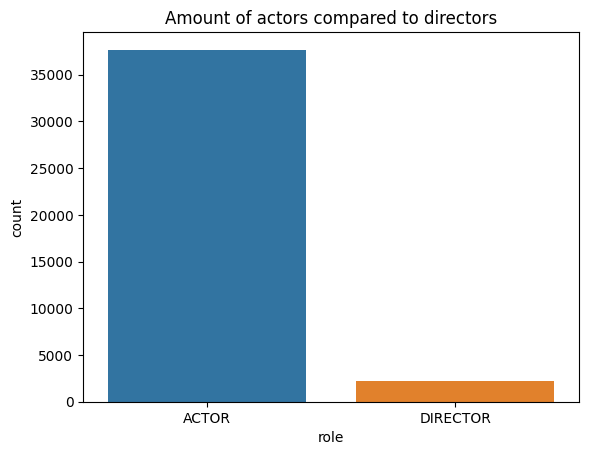

In [32]:
# How many of actors are there compared to directors?
sns.countplot(x='role', data=credits)
plt.title('Amount of actors compared to directors')
plt.show()

In [33]:
# We can see that there are a lot more actors than there are directors - this makes sense, since most movies have multiple
# actors, while there's usually one director

In [34]:
# Let's check which directors worked with the most actors

# Filter for directors
directors_data = credits[credits['role'] == 'DIRECTOR']

# Group directors data by 'name_director' and count unique actors
directors_with_most_actors = directors_data.groupby('name')['name'].count().reset_index(name='num_actors')

# Sort directors by number of actors in descending order
directors_with_most_actors = directors_with_most_actors.sort_values(by='num_actors', ascending=False)

# Display the directors with the most actors
print("Directors with the most actors:")
directors_with_most_actors.head()

Directors with the most actors:


,name,num_actors
791,Joseph Kane,25
1326,Sam Newfield,20
1315,Ryan Polito,19
1263,Robert N. Bradbury,14
717,Joel Gallen,13


In [35]:
# Let's do the same thing with actors that worked with most directors:

# Filter for actors
actors_data = credits[credits['role'] == 'ACTOR']

# Group directors data by 'name_actor' and count unique directors
actors_with_most_directors = actors_data.groupby('name')['name'].count().reset_index(name='num_directors')

# Sort actors by number of directors in descending order
actors_with_most_directors = actors_with_most_directors.sort_values(by='num_directors', ascending=False)

# Display the actors with the most directors
print("Actors with the most directors:")
actors_with_most_directors.head()

Actors with the most directors:


,name,num_directors
8770,George 'Gabby' Hayes,30
13061,John Wayne,26
22128,Roy Rogers,25
6919,Earl Dwire,25
8127,Forrest Taylor,21


In [36]:
# Let's see the top actors and directors based on the number of movies they directed/starred in

merged_datasets = pd.merge(titles, credits, on='id')
most_popular_actors_directors = merged_datasets.groupby('name').agg({'id': 'count'}).reset_index()

most_popular_actors_directors = most_popular_actors_directors.sort_values(by='id', ascending=False)

most_popular_actors_directors.columns = ['Actor/Director Name', 'Number of Titles']
most_popular_actors_directors.head()

,Actor/Director Name,Number of Titles
9033,George 'Gabby' Hayes,29
13505,John Wayne,26
7126,Earl Dwire,25
13831,Joseph Kane,25
22888,Roy Rogers,25


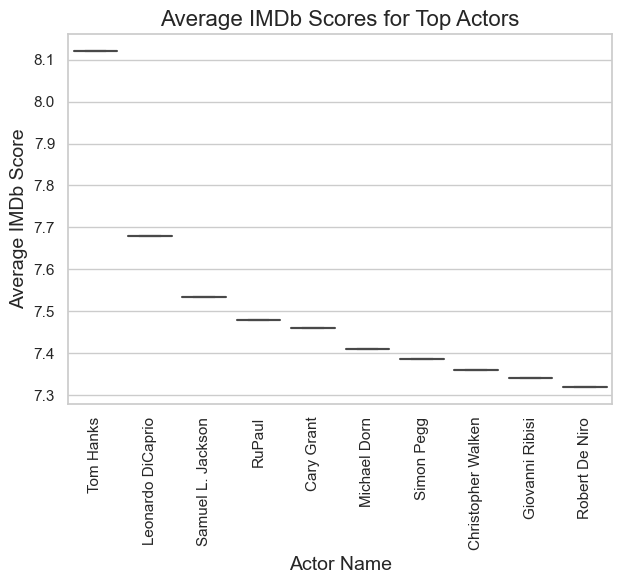

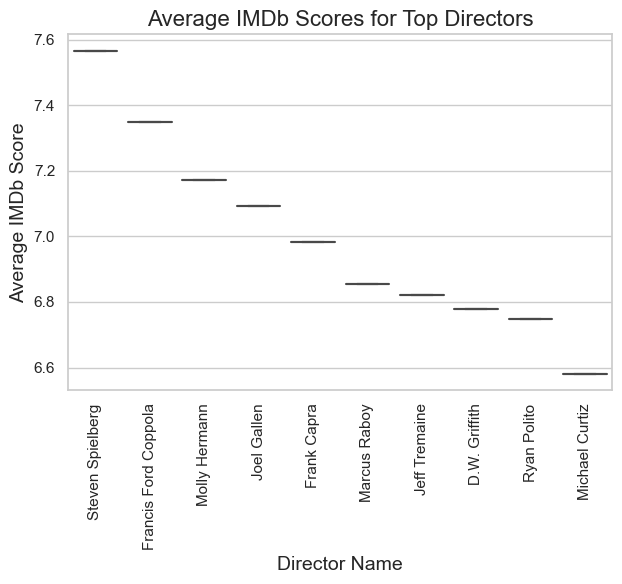

In [37]:
# We could check who the best actors or directors are based on their imdb average score 

# Actors
# we use .filter(lambda x: len(x) >= 5) because I decided that that should be the minimum amount titles it takes to rate an actor
top_actors = merged_datasets[merged_datasets['role'] == 'ACTOR'].groupby('name').filter(lambda x: len(x) >= 5)
avg_imdb_scores_actors = top_actors.groupby('name')['imdb_score'].mean().reset_index()

top_10_imdb_score_actors = avg_imdb_scores_actors.sort_values(by='imdb_score', ascending=False).head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='name', y='imdb_score', data=top_10_imdb_score_actors)
plt.title('Average IMDb Scores for Top Actors', fontsize=16)
plt.xlabel('Actor Name', fontsize=14)
plt.ylabel('Average IMDb Score', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()


# Directors
top_directors = merged_datasets[merged_datasets['role'] == 'DIRECTOR'].groupby('name').filter(lambda x: len(x) >= 5)
avg_imdb_scores_directors = top_directors.groupby('name')['imdb_score'].mean().reset_index()

top_10_imdb_score_directors = avg_imdb_scores_directors.sort_values(by='imdb_score', ascending=False).head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.boxplot(x='name', y='imdb_score', data=top_10_imdb_score_directors)
plt.title('Average IMDb Scores for Top Directors', fontsize=16)
plt.xlabel('Director Name', fontsize=14)
plt.ylabel('Average IMDb Score', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()


### Data Cleanup

In [38]:
credits.isna().sum()

person_id       0
id              0
name            0
character    3113
role            0
dtype: int64

In [39]:
# It makes sense that the people with 'DIRECTOR' roles don't have a 'character' attribute.
# Let's check if there are any actors that don't have a 'character'.

actors_with_missing_characters = credits[(credits['role'] == 'ACTOR') & credits['character'].isna()]
actors_with_missing_characters

,person_id,id,name,character,role
478,7755,tm59314,Bill Baldwin,NaN,ACTOR
479,836229,tm59314,Teddy Buckner,NaN,ACTOR
480,37829,tm59314,Frank Cady,NaN,ACTOR
481,57645,tm59314,Roy Engel,NaN,ACTOR
482,27257,tm59314,Douglas Evans,NaN,ACTOR
...,...,...,...,...,...
39601,1402758,tm960072,Josh Johnson,NaN,ACTOR
39602,85045,tm960072,Trevor Noah,NaN,ACTOR
39769,33102,tm1068951,Eve Plumb,NaN,ACTOR
39770,116168,tm1068951,Susan Olsen,NaN,ACTOR


In [40]:
credits.loc[credits['role'] == 'DIRECTOR', 'character'] = 'director'

In [41]:
# There are 935 instances of actors without characters - it's not a huge percentage, so we can just remove them from 
# the data set
credits.dropna(subset=['character'], inplace=True)
credits.reset_index(drop=True, inplace=True)

# New datasets

In [2]:
titles.to_csv('titles_preprocessed.csv', index=False)
credits.to_csv('credits_preprocessed.csv', index=False)

NameError: name 'titles' is not defined